In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Robust Analysis

In [8]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [20]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [19]:
df = df.dropna()

In [ ]:
encoders = []
for col in df.columns:
    if df[col].dtype == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder 
        


In [32]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


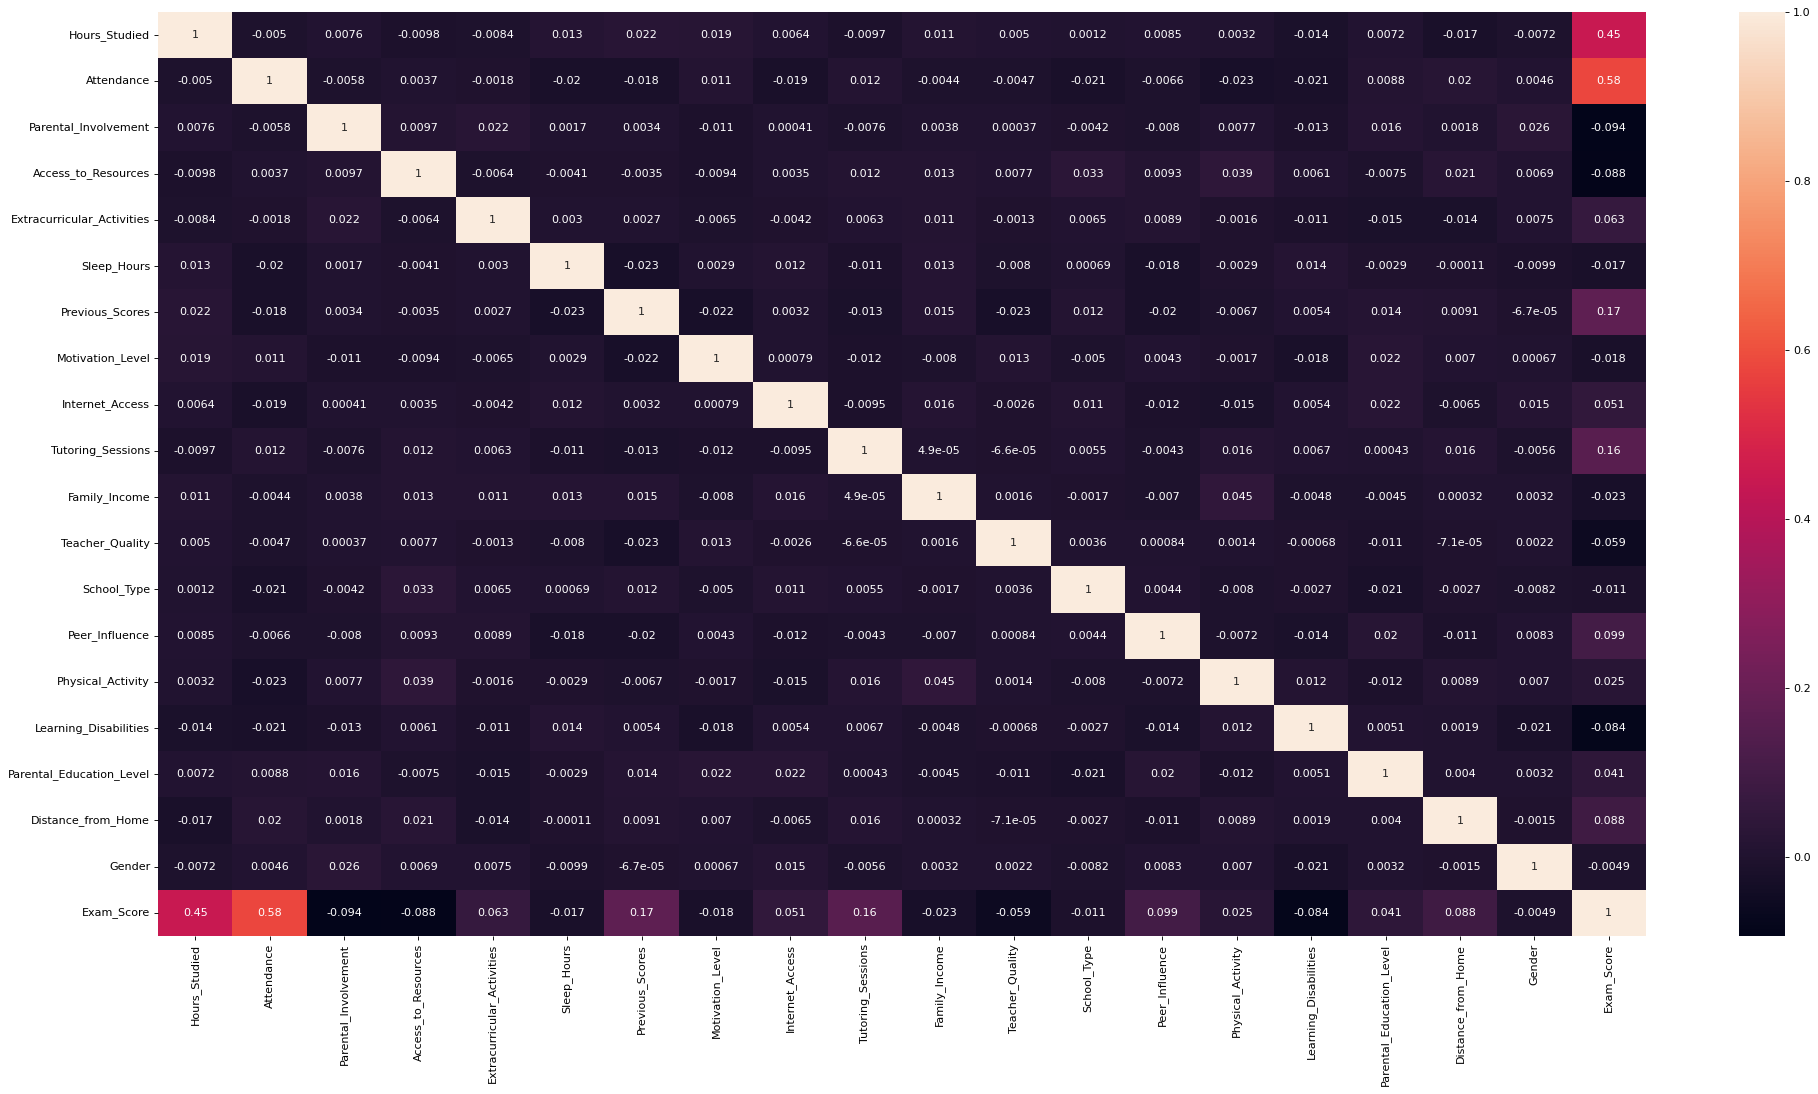

In [40]:
target = 'Exam_Score'
fig, ax = plt.subplots(figsize=(30, 15), dpi=80)
ax = sns.heatmap(pd.concat([df.drop(target,axis=1), df[target]],axis=1).corr(), annot=True)
plt.show()

In [42]:
# Chia dữ liệu thành X (feature) và y (target)
X = df.drop('Exam_Score', axis=1)

y = df['Exam_Score']

In [43]:
# Huấn luyện mô hình hồi quy
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [44]:
# Dự đoán Exam_Score
y_pred = model.predict(X)

In [46]:
# Đánh giá hiệu suất của mô hình khi chưa có dữ liệu nhiễu
mse1 = mean_squared_error(y, y_pred)
print(f'Mean Squared Error without noise: {mse1}')

Mean Squared Error without noise: 5.4140325413950565


In [97]:
#Thêm dữ liệu nhiễu vào dữ liệu
perturbation_factor = 0.1  # 10% nhiễu
X_noisy = X +perturbation_factor * np.random.randn(*X.shape) 

In [98]:
# Dự đoán với dữ liệu nhiễu
y_pred_noisy = model.predict(X_noisy)

In [99]:
# Đánh giá hiệu suất của mô hình khi thêm dữ liệu nhiễu
mse_noisy = mean_squared_error(y, y_pred_noisy)
print(f'Mean Squared Error with noise: {mse_noisy}')

Mean Squared Error with noise: 5.47382474281411


### MSE có sự tăng nhẹ (từ 5.414 lên 5.474), cho thấy rằng mô hình không hoàn toàn ổn định khi có nhiễu. Mặc dù sự thay đổi không quá lớn, nhưng nó vẫn cho thấy rằng nhiễu làm giảm hiệu quả của mô hình.

# RDP (Công thức Bellman)

In [ ]:
# Các tham số cơ bản
gamma = 0.9  # Hệ số chiết khấu
states = ["Low", "Medium", "High"]  # Các trạng thái động lực học tập của học sinh
actions = ["Increase_Hours", "Improve_Attendance"]  # Các hành động
models = [0, 1]  # Hai mô hình khác nhau

# Mô hình phần thưởng (R_i(s, a))
R = {
    0: {"Low": {"Increase_Hours": 5, "Improve_Attendance": 10},
        "Medium": {"Increase_Hours": 7, "Improve_Attendance": 8},
        "High": {"Increase_Hours": 10, "Improve_Attendance": 5}},
    1: {"Low": {"Increase_Hours": 3, "Improve_Attendance": 6},
        "Medium": {"Increase_Hours": 6, "Improve_Attendance": 7},
        "High": {"Increase_Hours": 9, "Improve_Attendance": 4}}
}

# Mô hình xác suất chuyển trạng thái (T_i(s' | s, a))
T = {
    0: {"Low": {"Increase_Hours": {"Low": 0.6, "Medium": 0.3, "High": 0.1},
                "Improve_Attendance": {"Low": 0.7, "Medium": 0.2, "High": 0.1}},
        "Medium": {"Increase_Hours": {"Medium": 0.8, "High": 0.2},
                   "Improve_Attendance": {"Medium": 0.6, "High": 0.4}},
        "High": {"Increase_Hours": {"High": 1.0},
                 "Improve_Attendance": {"High": 0.9, "Low": 0.1}}},
    1: {"Low": {"Increase_Hours": {"Low": 0.5, "Medium": 0.4, "High": 0.1},
                "Improve_Attendance": {"Low": 0.6, "Medium": 0.3, "High": 0.1}},
        "Medium": {"Increase_Hours": {"Medium": 0.7, "High": 0.3},
                   "Improve_Attendance": {"Medium": 0.5, "High": 0.5}},
        "High": {"Increase_Hours": {"High": 1.0},
                 "Improve_Attendance": {"High": 0.8, "Medium": 0.2}}}
}

# Khởi tạo giá trị U_k cho mỗi trạng thái
U_k = {"Low": 0, "Medium": 0, "High": 0}

# Số lần lặp
num_iterations = 10

# Bellman Update
for _ in range(num_iterations):
    U_next = {}
    for s in states:
        max_value = float('-inf')  # Khởi tạo giá trị cực đại
        for a in actions:
            min_value = float('inf')  # Khởi tạo giá trị cực tiểu cho mỗi hành động
            for i in models:
                reward = R[i][s][a]
                expected_value = sum(T[i][s][a].get(s_next, 0) * U_k.get(s_next, 0) for s_next in states)
                value = reward + gamma * expected_value
                min_value = min(min_value, value)
            max_value = max(max_value, min_value)
        U_next[s] = max_value
    U_k = U_next

# In kết quả cập nhật giá trị kỳ vọng
print(f"Giá trị tối ưu U(k+1): {U_k}")



Giá trị tối ưu U(s): {'Low': 50.00034913544875, 'Medium': 54.98381495932423, 'High': 58.61894039100001}
